# CIS 550 Project

### Importing and exploring the data

In [1]:
import warnings, requests, zipfile, io
warnings.simplefilter('ignore')
import pandas as pd
import os
RAND = 17

In [2]:
# zip_url = 'https://archive.ics.uci.edu/static/public/46/hepatitis.zip'
# website temporarily down
zip_url = 'https://github.com/jlallyumassd/CIS_550_Project/raw/main/hepatitis.zip'
r = requests.get(zip_url, stream=True)
Hepatitis_zip = zipfile.ZipFile(io.BytesIO(r.content))
Hepatitis_zip.extractall()

Assign headers to the columns

In [3]:
url = "hepatitis.data"
col_names = ['Class','Age','Sex','Steroid','Antivirals','Fatigue','Malaise','Anorexia',
             'Liver Big','Liver Firm','Spleen Palpable','Spiders','Ascites','Varices',
            'Bilirubin','ALK Phosphate','SGOT','Albumin','Protime','Histology']

df_hepatitis = pd.read_csv(url, sep = ',',names = col_names,na_values="?",header=None)

In [4]:
df_hepatitis['Sex'].value_counts()

1    139
2     16
Name: Sex, dtype: int64

In [5]:
df_hepatitis = pd.get_dummies(df_hepatitis,columns=['Sex'],drop_first=True)
df_hepatitis.rename(columns={"Sex_2": "Female"}, inplace=True)

In [6]:
df_hepatitis.shape

(155, 20)

In [7]:
df_hepatitis.head(5)

,Class,Age,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,ALK Phosphate,SGOT,Albumin,Protime,Histology,Female
0,2,30,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1,1
1,2,50,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1,0
2,2,78,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1,0
3,2,31,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1,0
4,2,34,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1,0


In [8]:
df_hepatitis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            155 non-null    int64  
 1   Age              155 non-null    int64  
 2   Steroid          154 non-null    float64
 3   Antivirals       155 non-null    int64  
 4   Fatigue          154 non-null    float64
 5   Malaise          154 non-null    float64
 6   Anorexia         154 non-null    float64
 7   Liver Big        145 non-null    float64
 8   Liver Firm       144 non-null    float64
 9   Spleen Palpable  150 non-null    float64
 10  Spiders          150 non-null    float64
 11  Ascites          150 non-null    float64
 12  Varices          150 non-null    float64
 13  Bilirubin        149 non-null    float64
 14  ALK Phosphate    126 non-null    float64
 15  SGOT             151 non-null    float64
 16  Albumin          139 non-null    float64
 17  Protime         

In [9]:
df_hepatitis.describe()

,Class,Age,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,ALK Phosphate,SGOT,Albumin,Protime,Histology,Female
count,155.000000,155.000000,154.000000,155.000000,154.000000,154.000000,154.000000,145.000000,144.000000,150.00000,150.000000,150.000000,150.00000,149.000000,126.000000,151.00000,139.000000,88.000000,155.000000,155.000000
mean,1.793548,41.200000,1.506494,1.845161,1.350649,1.603896,1.792208,1.827586,1.583333,1.80000,1.660000,1.866667,1.88000,1.427517,105.325397,85.89404,3.817266,61.852273,1.451613,0.103226
std,0.406070,12.565878,0.501589,0.362923,0.478730,0.490682,0.407051,0.379049,0.494727,0.40134,0.475296,0.341073,0.32605,1.212149,51.508109,89.65089,0.651523,22.875244,0.499266,0.305240
min,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,0.300000,26.000000,14.00000,2.100000,0.000000,1.000000,0.000000
25%,2.000000,32.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.00000,1.000000,2.000000,2.00000,0.700000,74.250000,31.50000,3.400000,46.000000,1.000000,0.000000
50%,2.000000,39.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,1.000000,85.000000,58.00000,4.000000,61.000000,1.000000,0.000000
75%,2.000000,50.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,1.500000,132.250000,100.50000,4.200000,76.250000,2.000000,0.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,8.000000,295.000000,648.00000,6.400000,100.000000,2.000000,1.000000


In [10]:
# Show columns with most missing values
df_hepatitis.isna().mean().sort_values(ascending=False).head(10)
# Protime is missing almost half of its values.  ALK Phosphate and Albumin are missing some, the rest are not bad.

Protime            0.432258
ALK Phosphate      0.187097
Albumin            0.103226
Liver Firm         0.070968
Liver Big          0.064516
Bilirubin          0.038710
Spleen Palpable    0.032258
Varices            0.032258
Ascites            0.032258
Spiders            0.032258
dtype: float64

In [11]:
yes_no_columns = ['Steroid','Antivirals','Fatigue','Malaise','Anorexia',
                  'Liver Big','Liver Firm','Spleen Palpable','Spiders','Ascites','Varices',
                  'Histology']
mapping = {1: 0, 2: 1}
df_hepatitis[yes_no_columns] = df_hepatitis[yes_no_columns].replace(mapping)
df_hepatitis.describe()

,Class,Age,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,ALK Phosphate,SGOT,Albumin,Protime,Histology,Female
count,155.000000,155.000000,154.000000,155.000000,154.000000,154.000000,154.000000,145.000000,144.000000,150.00000,150.000000,150.000000,150.00000,149.000000,126.000000,151.00000,139.000000,88.000000,155.000000,155.000000
mean,1.793548,41.200000,0.506494,0.845161,0.350649,0.603896,0.792208,0.827586,0.583333,0.80000,0.660000,0.866667,0.88000,1.427517,105.325397,85.89404,3.817266,61.852273,0.451613,0.103226
std,0.406070,12.565878,0.501589,0.362923,0.478730,0.490682,0.407051,0.379049,0.494727,0.40134,0.475296,0.341073,0.32605,1.212149,51.508109,89.65089,0.651523,22.875244,0.499266,0.305240
min,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.300000,26.000000,14.00000,2.100000,0.000000,0.000000,0.000000
25%,2.000000,32.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.00000,0.000000,1.000000,1.00000,0.700000,74.250000,31.50000,3.400000,46.000000,0.000000,0.000000
50%,2.000000,39.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,85.000000,58.00000,4.000000,61.000000,0.000000,0.000000
75%,2.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.500000,132.250000,100.50000,4.200000,76.250000,1.000000,0.000000
max,2.000000,78.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,8.000000,295.000000,648.00000,6.400000,100.000000,1.000000,1.000000


## Analyzing the target

In [12]:
df_hepatitis['Class'].value_counts()

2    123
1     32
Name: Class, dtype: int64

In [13]:
# The UCI file encodes DIE = 1 and LIVE = 2.
# For consistency with scikit‑learn, we map this to 1 = die (positive class), 0 = live
class_mapper = {1:1,2:0} #1 = DIE, 0 = LIVE
df_hepatitis['Class']=df_hepatitis['Class'].replace(class_mapper)

In [14]:
# Show class imbalance
target_counts = df_hepatitis['Class'].value_counts()
display(target_counts)

print(f"Death rate: {target_counts[1]/target_counts.sum():.1%}")

0    123
1     32
Name: Class, dtype: int64

Death rate: 20.6%


In [15]:
df_hepatitis

,Class,Age,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,ALK Phosphate,SGOT,Albumin,Protime,Histology,Female
0,0,30,0.0,1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,85.0,18.0,4.0,NaN,0,1
1,0,50,0.0,1,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.9,135.0,42.0,3.5,NaN,0,0
2,0,78,1.0,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,96.0,32.0,4.0,NaN,0,0
3,0,31,NaN,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,46.0,52.0,4.0,80.0,0,0
4,0,34,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,200.0,4.0,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1.0,1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,7.6,NaN,242.0,3.3,50.0,1,0
151,0,44,1.0,1,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.9,126.0,142.0,4.3,NaN,1,0
152,0,61,0.0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.8,75.0,20.0,4.1,NaN,1,0
153,0,53,0.0,1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.5,81.0,19.0,4.1,48.0,1,1


### Attribute Information (with Units)

- **CLASS**: LIVE = 0, DIE = 1 (Binary Outcome)  
- **AGE**: Patient age in years (Years)  
- **FEMALE**: Female = 1, Male = 0 (Binary)  
- **STEROID**: Taking corticosteroids = 1 (Binary)  
- **ANTIVIRALS**: Receiving antiviral treatment = 1 (Binary)  
- **FATIGUE**: Patient reports fatigue = 1 (Binary)  
- **MALAISE**: General feeling of illness = 1 (Binary)  
- **ANOREXIA**: Loss of appetite = 1 (Binary)  
- **LIVER BIG**: Liver is enlarged = 1 (Binary)  
- **LIVER FIRM**: Liver is firm = 1 (Binary)  
- **SPLEEN PALPABLE**: Spleen is palpable = 1 (Binary)  
- **SPIDERS**: Spider angiomata present = 1 (Binary)  
- **ASCITES**: Abdominal fluid accumulation = 1 (Binary)  
- **VARICES**: Esophageal varices present = 1 (Binary)  
- **BILIRUBIN**: Serum bilirubin level (mg/dL)  
- **ALK PHOSPHATE**: Alkaline phosphatase level (IU/L)  
- **SGOT**: AST (SGOT) enzyme level (IU/L)  
- **ALBUMIN**: Serum albumin level (g/dL)  
- **PROTIME**: Prothrombin time (seconds)  
- **HISTOLOGY**: Histological diagnosis = 1 (Binary)  


## Handle missing values

In [16]:
# Check for missing values
missing_summary = df_hepatitis.isna().sum()
missing_summary[missing_summary > 0]

Steroid             1
Fatigue             1
Malaise             1
Anorexia            1
Liver Big          10
Liver Firm         11
Spleen Palpable     5
Spiders             5
Ascites             5
Varices             5
Bilirubin           6
ALK Phosphate      29
SGOT                4
Albumin            16
Protime            67
dtype: int64

In [17]:
print(df_hepatitis.columns.tolist())

['Class', 'Age', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia', 'Liver Big', 'Liver Firm', 'Spleen Palpable', 'Spiders', 'Ascites', 'Varices', 'Bilirubin', 'ALK Phosphate', 'SGOT', 'Albumin', 'Protime', 'Histology', 'Female']


In [18]:
from sklearn.impute import SimpleImputer

# Drop the 'Protime' column due to nearly 50% missing values
df_hepatitis.drop(columns=['Protime'], inplace=True)

# Manually define categorical and numerical columns
categorical_cols = ['Female', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia',
    'Liver Big', 'Liver Firm', 'Spleen Palpable', 'Spiders', 'Ascites',
    'Varices', 'Histology']
numerical_cols = ['Age', 'Bilirubin', 'ALK Phosphate', 'SGOT', 'Albumin']

# Mode imputation for categorical variables
mode_imputer = SimpleImputer(strategy='most_frequent')
df_hepatitis[categorical_cols] = mode_imputer.fit_transform(df_hepatitis[categorical_cols])
df_hepatitis[categorical_cols] = df_hepatitis[categorical_cols].astype('Int8')

# Median imputation for numerical variables
median_imputer = SimpleImputer(strategy='median')
df_hepatitis[numerical_cols] = median_imputer.fit_transform(df_hepatitis[numerical_cols])
df_hepatitis[numerical_cols] = df_hepatitis[numerical_cols].astype('float32')

# Final structure
df_hepatitis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            155 non-null    int64  
 1   Age              155 non-null    float32
 2   Steroid          155 non-null    Int8   
 3   Antivirals       155 non-null    Int8   
 4   Fatigue          155 non-null    Int8   
 5   Malaise          155 non-null    Int8   
 6   Anorexia         155 non-null    Int8   
 7   Liver Big        155 non-null    Int8   
 8   Liver Firm       155 non-null    Int8   
 9   Spleen Palpable  155 non-null    Int8   
 10  Spiders          155 non-null    Int8   
 11  Ascites          155 non-null    Int8   
 12  Varices          155 non-null    Int8   
 13  Bilirubin        155 non-null    float32
 14  ALK Phosphate    155 non-null    float32
 15  SGOT             155 non-null    float32
 16  Albumin          155 non-null    float32
 17  Histology       

In [19]:
# Type casting
# Convert binary columns to int8 and target to int
binary_cols = [c for c in df_hepatitis.columns if 
df_hepatitis[c].dropna().isin([0,1]).all()] 
df_hepatitis[binary_cols] = df_hepatitis[binary_cols].astype('int8') 
df_hepatitis['Class'] = df_hepatitis['Class'].astype('int')
df_hepatitis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            155 non-null    int32  
 1   Age              155 non-null    float32
 2   Steroid          155 non-null    int8   
 3   Antivirals       155 non-null    int8   
 4   Fatigue          155 non-null    int8   
 5   Malaise          155 non-null    int8   
 6   Anorexia         155 non-null    int8   
 7   Liver Big        155 non-null    int8   
 8   Liver Firm       155 non-null    int8   
 9   Spleen Palpable  155 non-null    int8   
 10  Spiders          155 non-null    int8   
 11  Ascites          155 non-null    int8   
 12  Varices          155 non-null    int8   
 13  Bilirubin        155 non-null    float32
 14  ALK Phosphate    155 non-null    float32
 15  SGOT             155 non-null    float32
 16  Albumin          155 non-null    float32
 17  Histology       

In [20]:
# Confirm binary columns are type casted correctly
df_hepatitis

,Class,Age,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,ALK Phosphate,SGOT,Albumin,Histology,Female
0,0,30.0,0,1,1,1,1,0,1,1,1,1,1,1.0,85.0,18.0,4.0,0,1
1,0,50.0,0,1,0,1,1,0,1,1,1,1,1,0.9,135.0,42.0,3.5,0,0
2,0,78.0,1,1,0,1,1,1,1,1,1,1,1,0.7,96.0,32.0,4.0,0,0
3,0,31.0,1,0,1,1,1,1,1,1,1,1,1,0.7,46.0,52.0,4.0,0,0
4,0,34.0,1,1,1,1,1,1,1,1,1,1,1,1.0,85.0,200.0,4.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46.0,1,1,0,0,0,1,1,1,0,0,0,7.6,85.0,242.0,3.3,1,0
151,0,44.0,1,1,0,1,1,1,0,1,1,1,1,0.9,126.0,142.0,4.3,1,0
152,0,61.0,0,1,0,0,1,0,0,1,0,1,1,0.8,75.0,20.0,4.1,1,0
153,0,53.0,0,1,0,1,1,1,1,0,0,1,0,1.5,81.0,19.0,4.1,1,1


In [21]:
# Compact value counts for each yes/no column
for c in binary_cols: print(f"{c}: {df_hepatitis[c].value_counts(normalize=True).round(2).to_dict()}")
# Summarizes which columns are imbalanced

Class: {0: 0.79, 1: 0.21}
Steroid: {1: 0.51, 0: 0.49}
Antivirals: {1: 0.85, 0: 0.15}
Fatigue: {0: 0.65, 1: 0.35}
Malaise: {1: 0.61, 0: 0.39}
Anorexia: {1: 0.79, 0: 0.21}
Liver Big: {1: 0.84, 0: 0.16}
Liver Firm: {1: 0.61, 0: 0.39}
Spleen Palpable: {1: 0.81, 0: 0.19}
Spiders: {1: 0.67, 0: 0.33}
Ascites: {1: 0.87, 0: 0.13}
Varices: {1: 0.88, 0: 0.12}
Histology: {0: 0.55, 1: 0.45}
Female: {0: 0.9, 1: 0.1}


# Visualizing the data

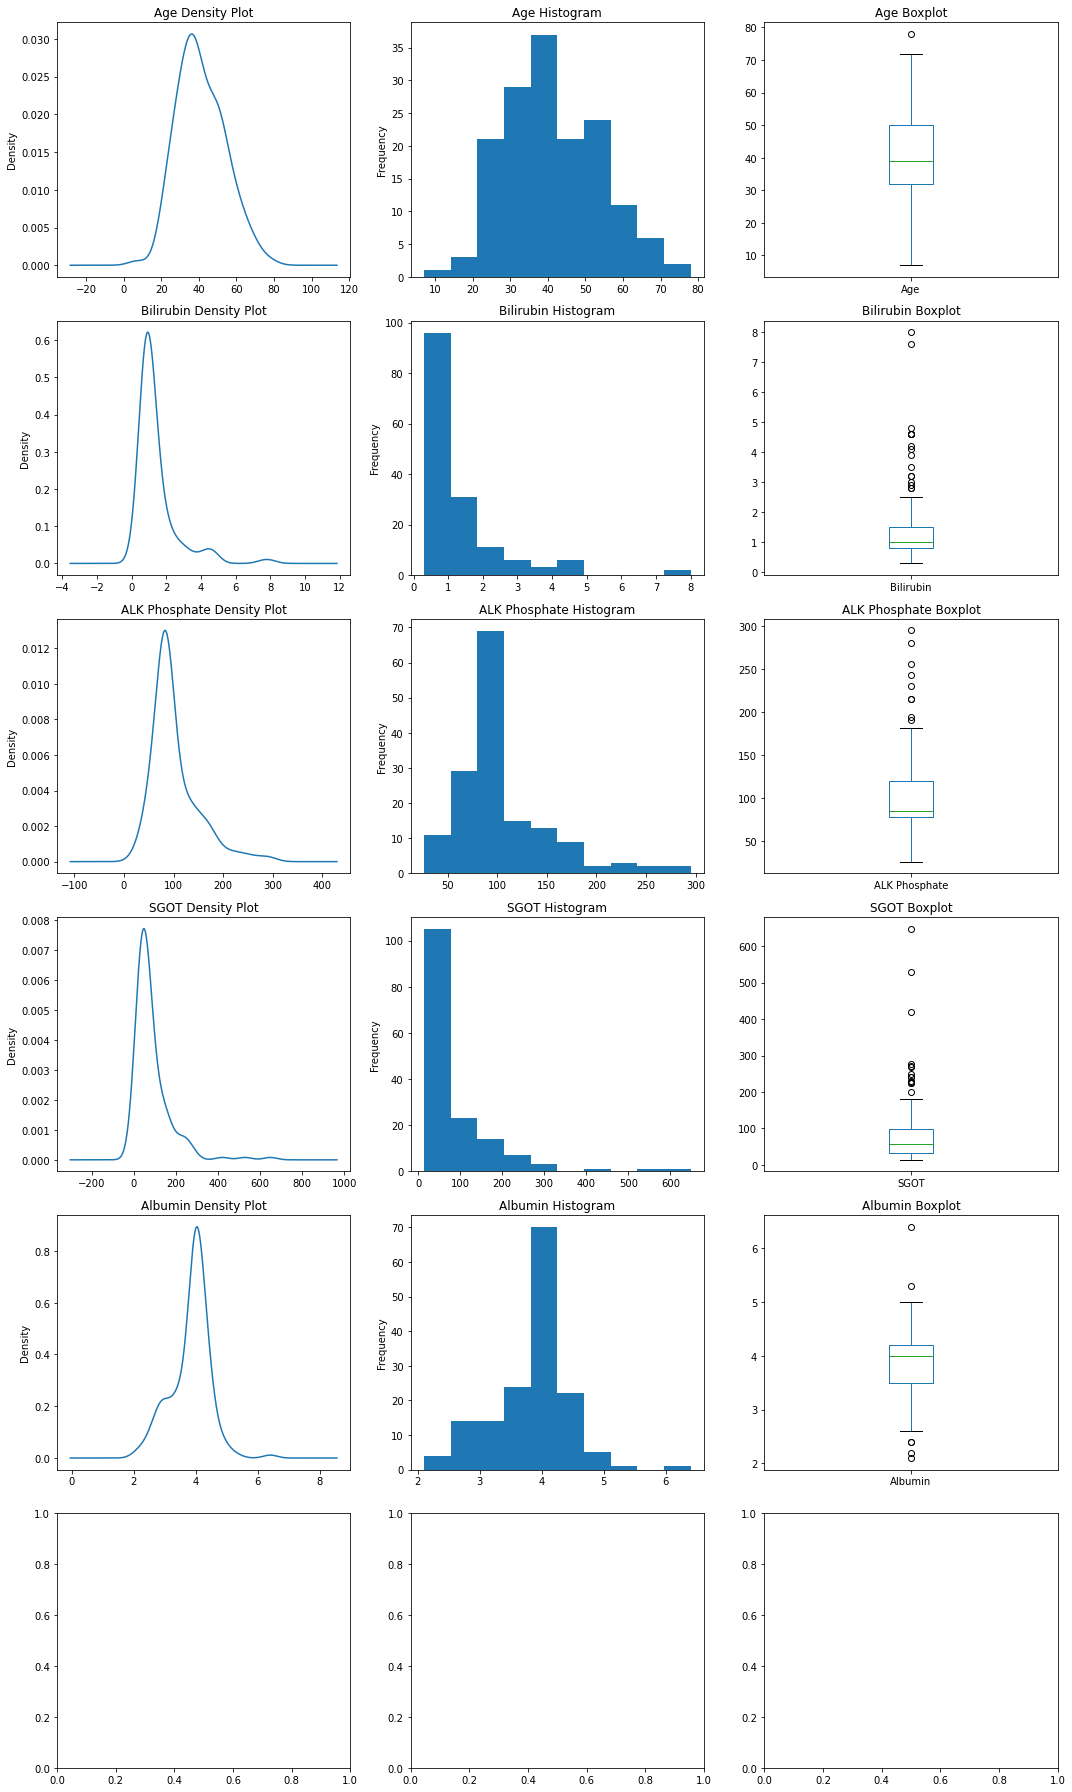

In [22]:
import matplotlib.pyplot as plt
columns = ['Age', 'Bilirubin', 'ALK Phosphate', 'SGOT', 'Albumin']
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 25))

for i, col in enumerate(columns):
    # Density plot
    df_hepatitis[col].plot.density(ax=axes[i, 0])
    axes[i, 0].set_title(f'{col} Density Plot')
    
    # Histogram
    df_hepatitis[col].plot.hist(ax=axes[i, 1])
    axes[i, 1].set_title(f'{col} Histogram')
    
    # Boxplot
    df_hepatitis[col].plot.box(ax=axes[i, 2])
    axes[i, 2].set_title(f'{col} Boxplot')

plt.tight_layout()
plt.show()

Top continuous numeric features: ['Albumin', 'Bilirubin', 'Age', 'ALK Phosphate']


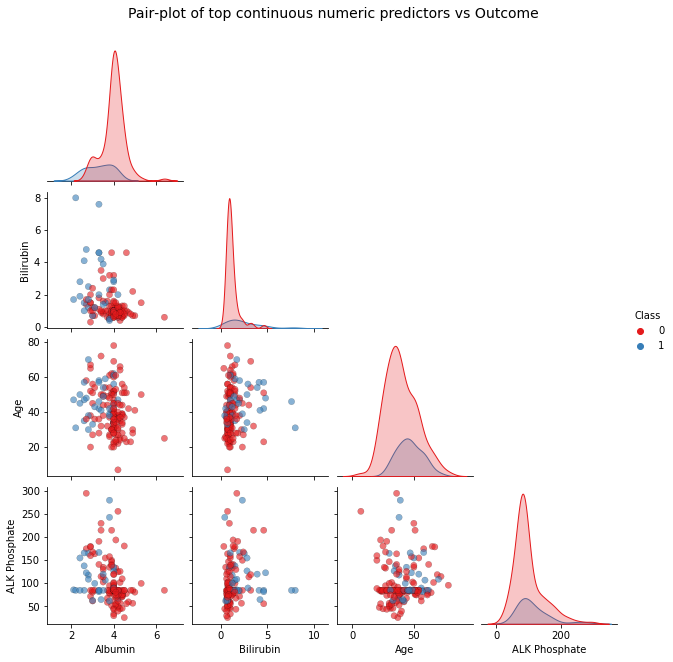

In [23]:
# Compact pair‑plot
import seaborn as sns, matplotlib.pyplot as plt

# Identify numeric columns
num_cols = df_hepatitis.select_dtypes(include=['number']).columns.drop('Class')

# Keep only those with more than 5 unique values
num_cont = [c for c in num_cols if df_hepatitis[c].nunique() > 5]

# Correlation with outcome & choose top 4
corr = df_hepatitis[num_cont].corrwith(df_hepatitis['Class']).abs()
top_feats = corr.sort_values(ascending=False).head(4).index
print("Top continuous numeric features:", list(top_feats))

# Pair‑plot
sns.pairplot(
    df_hepatitis,
    vars=top_feats,
    hue='Class',
    palette='Set1',
    corner=True,
    height=2.2,
    aspect=1.0,
    plot_kws=dict(alpha=0.6, s=40, edgecolor='k', linewidth=0.2),
)
plt.suptitle("Pair‑plot of top continuous numeric predictors vs Outcome",
             y=1.04, fontsize=14)
plt.show()

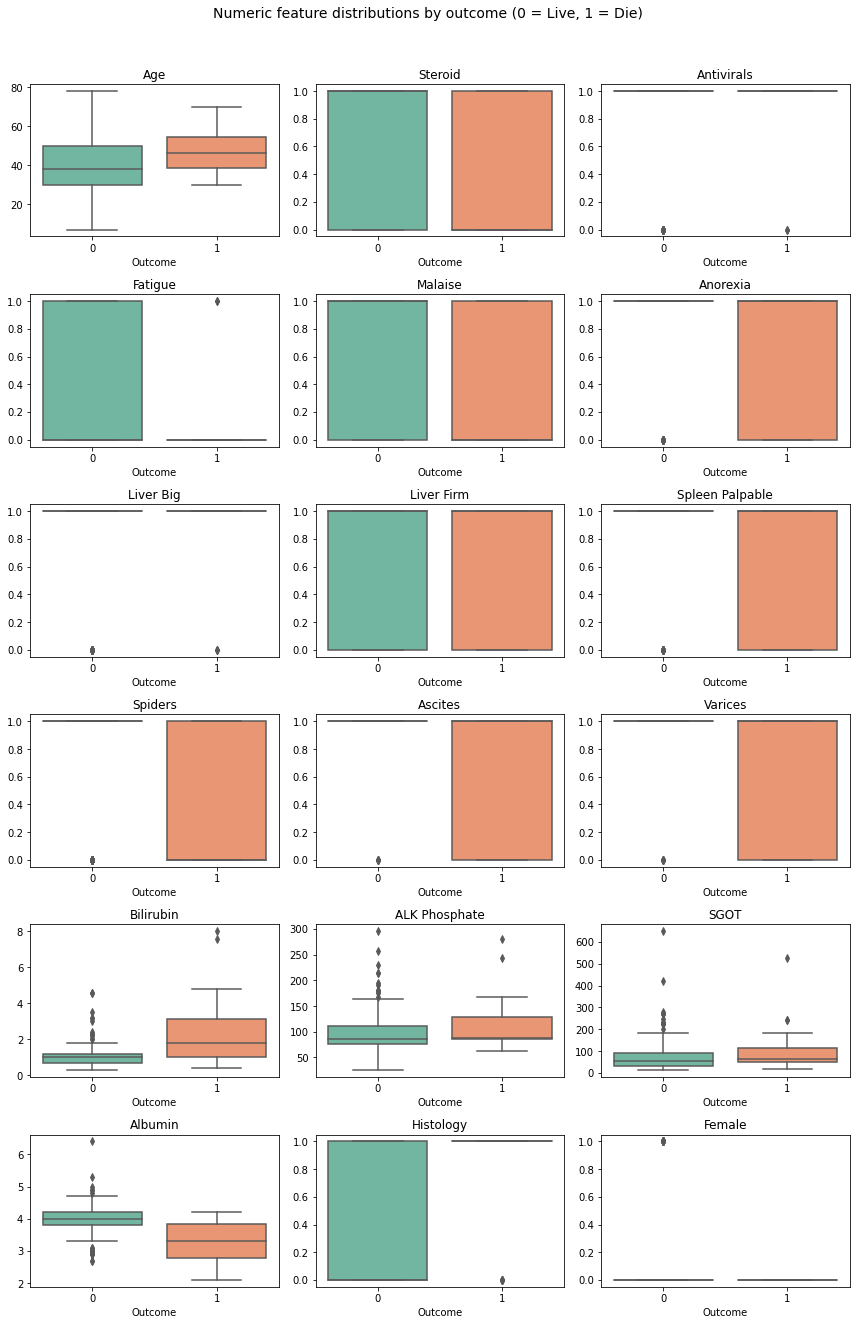

In [24]:
# Grid of box‑plots
import math, matplotlib.pyplot as plt, seaborn as sns

num_cols = df_hepatitis.select_dtypes(include=['number']).columns.drop('Class')

cols_per_row = 3                                 
rows = math.ceil(len(num_cols) / cols_per_row)

fig, axes = plt.subplots(rows, cols_per_row,
                         figsize=(cols_per_row * 4, rows * 3),
                         sharey=False)

for ax, col in zip(axes.flatten(), num_cols):
    sns.boxplot(x='Class', y=col, data=df_hepatitis,
                palette='Set2', ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Outcome');  ax.set_ylabel(None)

# Hide any empty subplot slots
for ax in axes.flatten()[len(num_cols):]:
    ax.set_visible(False)

fig.suptitle("Numeric feature distributions by outcome (0 = Live, 1 = Die)",
             y=1.02, fontsize=14)
fig.tight_layout()
plt.show()


In [25]:
corr_matrix = df_hepatitis.corr()
corr_matrix["Class"].sort_values(ascending=False)

Class              1.000000
Bilirubin          0.445012
Histology          0.337856
Age                0.219647
Antivirals         0.130196
ALK Phosphate      0.125083
Liver Big          0.093665
SGOT               0.069572
Liver Firm        -0.020057
Anorexia          -0.133638
Steroid           -0.137413
Female            -0.173051
Spleen Palpable   -0.234261
Fatigue           -0.306049
Malaise           -0.339530
Varices           -0.362385
Spiders           -0.389137
Albumin           -0.455927
Ascites           -0.469334
Name: Class, dtype: float64

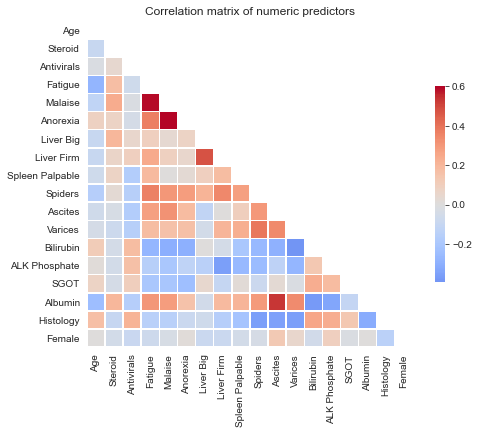

In [26]:
# Correlation heat‑map
import numpy as np, seaborn as sns, matplotlib.pyplot as plt

num_cols = df_hepatitis.select_dtypes(include=['number']).columns.drop('Class')
corr = df_hepatitis[num_cols].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))   # mask upper triangle
sns.set_style("white")
plt.figure(figsize=(8, 6))
sns.heatmap(corr, mask=mask, cmap='coolwarm', center=0,
            square=True, linewidths=.5, cbar_kws={'shrink': .6})
plt.title("Correlation matrix of numeric predictors")
plt.show()


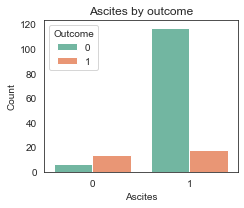

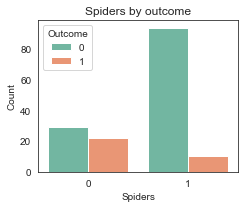

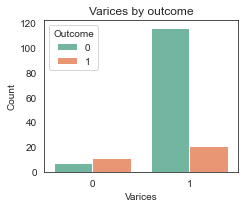

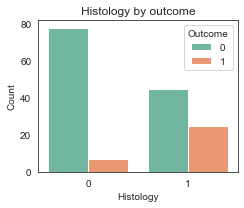

In [27]:
# Count‑plots for informative categorical flags
import matplotlib.pyplot as plt, seaborn as sns

flag_cols = ['Ascites', 'Spiders', 'Varices', 'Histology']
for c in flag_cols:
    plt.figure(figsize=(3.5, 3))
    sns.countplot(x=c, hue='Class', data=df_hepatitis, palette='Set2')
    plt.title(f"{c} by outcome")
    plt.xlabel(c);  plt.ylabel("Count")
    plt.legend(title='Outcome')
    plt.tight_layout()
    plt.show()


### Exploratory insights

* **Albumin** and **Bilirubin** show the clearest numeric separation between live‑ and die‑class patients.
* Binary clinical flags such as **Ascites** and **Spiders** are noticeably more prevalent in the death class.
* No pair of numeric labs displays extreme multicollinearity (|ρ| > 0.8); therefore, all remaining predictors are retained for modelling.


# Preparing data for training

## Splitting the data

In [28]:
from sklearn.model_selection import train_test_split
train, test_and_validate = train_test_split(df_hepatitis, test_size=0.2, random_state=RAND, stratify=df_hepatitis['Class'])
# 80% training, 20% testing and validation

In [29]:
test, validate = train_test_split(test_and_validate, test_size=0.5, random_state=RAND, stratify=test_and_validate['Class'])
# 10% testing and 10% validation

In [30]:
print(train.shape)
print(test.shape)
print(validate.shape)

(124, 19)
(15, 19)
(16, 19)


In [31]:
print(train['Class'].value_counts())
print(test['Class'].value_counts())
print(validate['Class'].value_counts())

0    98
1    26
Name: Class, dtype: int64
0    12
1     3
Name: Class, dtype: int64
0    13
1     3
Name: Class, dtype: int64


# Training the model

In [32]:
from xgboost import XGBClassifier
model = XGBClassifier(objective='binary:logistic', eval_metric='auc', n_estimators=17, random_state = RAND)
print(model.fit(train.drop(['Class'], axis=1).values, train['Class'].values))
print("Training Completed")

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=17, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=17, ...)
Training Completed


## Performing predictions

In [33]:
test.shape

(15, 19)

In [34]:
row = test.iloc[0:1,1:]
row.head()

,Age,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,ALK Phosphate,SGOT,Albumin,Histology,Female
49,38.0,1,0,0,0,0,1,1,1,0,1,1,0.7,125.0,65.0,4.2,0,0


In [35]:
model.predict_proba(row)

array([[0.9088845 , 0.09111544]], dtype=float32)

In [36]:
test.head(5)

,Class,Age,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,ALK Phosphate,SGOT,Albumin,Histology,Female
49,0,38.0,1,0,0,0,0,1,1,1,0,1,1,0.7,125.0,65.0,4.2,0,0
68,0,39.0,1,1,0,1,1,1,1,1,1,1,1,1.0,34.0,15.0,4.0,0,0
45,0,28.0,1,1,0,0,1,1,1,1,1,1,1,0.7,74.0,110.0,4.4,0,0
18,0,38.0,1,1,1,1,1,1,1,1,1,1,1,0.7,53.0,42.0,4.1,1,0
116,0,24.0,0,1,0,1,1,1,1,1,1,1,1,1.0,85.0,34.0,4.1,1,0


## Performing a batch transform

In [37]:
batch_X = test.iloc[:,1:];
batch_X.head()

,Age,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,ALK Phosphate,SGOT,Albumin,Histology,Female
49,38.0,1,0,0,0,0,1,1,1,0,1,1,0.7,125.0,65.0,4.2,0,0
68,39.0,1,1,0,1,1,1,1,1,1,1,1,1.0,34.0,15.0,4.0,0,0
45,28.0,1,1,0,0,1,1,1,1,1,1,1,0.7,74.0,110.0,4.4,0,0
18,38.0,1,1,1,1,1,1,1,1,1,1,1,0.7,53.0,42.0,4.1,1,0
116,24.0,0,1,0,1,1,1,1,1,1,1,1,1.0,85.0,34.0,4.1,1,0


In [38]:
predicted_probabilities = model.predict_proba(batch_X)

In [39]:
target_predicted = pd.DataFrame(predicted_probabilities[:, 1], columns=['class'])
target_predicted.head(15)

,class
0,0.091115
1,0.039028
2,0.011033
3,0.063012
4,0.013311
5,0.016775
6,0.182501
7,0.080576
8,0.057629
9,0.012484


In [40]:
def binary_convert(x):
    threshold = 0.50
    if x > threshold:
        return 1
    else:
        return 0

target_predicted['class'] = target_predicted['class'].apply(binary_convert)
target_predicted_binary = target_predicted['class'].apply(binary_convert)

print(target_predicted_binary.head(15))
test.head(15)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    1
12    0
13    0
14    0
Name: class, dtype: int64


,Class,Age,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,ALK Phosphate,SGOT,Albumin,Histology,Female
49,0,38.0,1,0,0,0,0,1,1,1,0,1,1,0.7,125.0,65.0,4.2,0,0
68,0,39.0,1,1,0,1,1,1,1,1,1,1,1,1.0,34.0,15.0,4.0,0,0
45,0,28.0,1,1,0,0,1,1,1,1,1,1,1,0.7,74.0,110.0,4.4,0,0
18,0,38.0,1,1,1,1,1,1,1,1,1,1,1,0.7,53.0,42.0,4.1,1,0
116,0,24.0,0,1,0,1,1,1,1,1,1,1,1,1.0,85.0,34.0,4.1,1,0
8,0,39.0,1,1,0,1,1,1,0,1,1,1,1,0.7,85.0,48.0,4.4,0,0
135,0,25.0,1,1,0,1,1,0,0,0,0,0,0,1.3,181.0,181.0,4.5,1,0
118,1,61.0,0,1,0,0,1,1,1,1,0,1,1,1.0,85.0,58.0,4.0,1,0
23,0,42.0,1,1,1,1,1,1,1,1,1,1,1,0.9,60.0,63.0,4.7,0,0
43,0,56.0,0,1,0,1,1,1,1,1,1,1,1,0.7,71.0,18.0,4.4,0,0


## Confusion Matrix

In [41]:
test_labels = test.iloc[:,0]
test_labels.head(5)

49     0
68     0
45     0
18     0
116    0
Name: Class, dtype: int32

In [42]:
print(target_predicted[:5])
print(test_labels[:5])
print(type(target_predicted))
print(target_predicted.shape)

   class
0      0
1      0
2      0
3      0
4      0
49     0
68     0
45     0
18     0
116    0
Name: Class, dtype: int32
<class 'pandas.core.frame.DataFrame'>
(15, 1)


In [43]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(test_labels, target_predicted_binary)
df_confusion = pd.DataFrame(matrix, index=['Live','Die'],columns=['Live','Die'])

df_confusion

,Live,Die
Live,12,0
Die,2,1


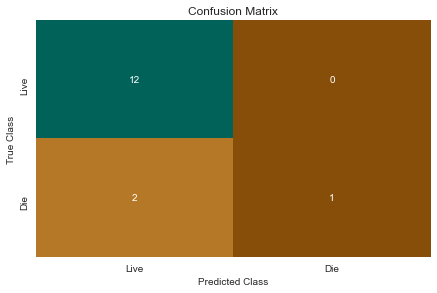

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

colormap = sns.color_palette("BrBG", 10)
sns.heatmap(df_confusion, annot=True, cbar=None, cmap=colormap)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

## Performance metrics

In [45]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

TN, FP, FN, TP = confusion_matrix(test_labels, target_predicted_binary).ravel()

print(f"True Negative (TN) : {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")
print(f"True Positive (TP) : {TP}")

# Sensitivity, hit rate, recall, or true positive rate
Sensitivity  = float(TP)/(TP+FN)*100
print(f"Sensitivity or TPR: {Sensitivity}%")  
print(f"There is a {Sensitivity}% chance of correctly predicting patients who died will die.")

# Specificity or true negative rate
Specificity  = float(TN)/(TN+FP)*100
print(f"Specificity or TNR: {Specificity}%") 
print(f"There is a {Specificity}% chance of predicting patients who live will live.")

# Precision or positive predictive value
Precision = float(TP)/(TP+FP)*100
print(f"Precision: {Precision}%")  
print(f"This patient will die, and the probablity that is correct is {Precision}%")

# Negative predictive value
NPV = float(TN)/(TN+FN)*100
print(f"Negative Predictive Value: {NPV}%") 
print(f"This patient will not die, but there is a {NPV}% chance that is incorrect" )

# Fall out or false positive rate
FPR = float(FP)/(FP+TN)*100
print( f"False Positive Rate: {FPR}%") 
print( f"There is a {FPR}% chance that this positive result is incorrect.")

# False negative rate
FNR = float(FN)/(TP+FN)*100
print(f"False Negative Rate: {FNR}%") 
print(f"There is a {FNR}% chance that this negative result is incorrect.")

# False discovery rate
FDR = float(FP)/(TP+FP)*100
print(f"False Discovery Rate: {FDR}%" )
print(f"This patient will die, but there is a {FDR}% chance this is incorrect.")

# Overall accuracy
ACC = float(TP+TN)/(TP+FP+FN+TN)*100
print(f"Accuracy: {ACC}%") 

print(f"Sensitivity or TPR: {Sensitivity}%")    
print(f"Specificity or TNR: {Specificity}%") 
print(f"Precision: {Precision}%")   
print(f"Negative Predictive Value: {NPV}%")  
print( f"False Positive Rate: {FPR}%") 
print(f"False Negative Rate: {FNR}%")  
print(f"False Discovery Rate: {FDR}%" )
print(f"Accuracy: {ACC}%") 

True Negative (TN) : 12
False Positive (FP): 0
False Negative (FN): 2
True Positive (TP) : 1
Sensitivity or TPR: 33.33333333333333%
There is a 33.33333333333333% chance of correctly predicting patients who died will die.
Specificity or TNR: 100.0%
There is a 100.0% chance of predicting patients who live will live.
Precision: 100.0%
This patient will die, and the probablity that is correct is 100.0%
Negative Predictive Value: 85.71428571428571%
This patient will not die, but there is a 85.71428571428571% chance that is incorrect
False Positive Rate: 0.0%
There is a 0.0% chance that this positive result is incorrect.
False Negative Rate: 66.66666666666666%
There is a 66.66666666666666% chance that this negative result is incorrect.
False Discovery Rate: 0.0%
This patient will die, but there is a 0.0% chance this is incorrect.
Accuracy: 86.66666666666667%
Sensitivity or TPR: 33.33333333333333%
Specificity or TNR: 100.0%
Precision: 100.0%
Negative Predictive Value: 85.71428571428571%
False

## AUC-ROC Curve

In [46]:
test_labels = test.iloc[:,0];
print("Validation AUC", roc_auc_score(test_labels, target_predicted) )

Validation AUC 0.6666666666666666


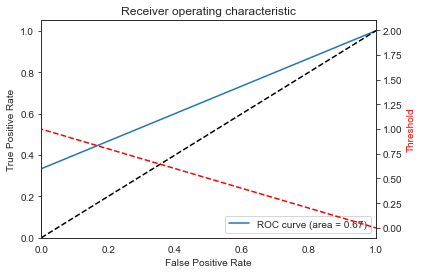

In [47]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming test_labels and target_predicted are defined

fpr, tpr, thresholds = roc_curve(test_labels, target_predicted)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

ax2 = plt.gca().twinx()
ax2.plot(fpr, thresholds, markeredgecolor='r', linestyle='dashed', color='r')
ax2.set_ylabel('Threshold', color='r')
ax2.set_xlim([fpr[0], fpr[-1]])

plt.show()

# Hyperparameter Tuning

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score


    
def plot_confusion_matrix(test_labels, target_predicted):
    matrix = confusion_matrix(test_labels, target_predicted)
    df_confusion = pd.DataFrame(matrix)
    colormap = sns.color_palette("BrBG", 10)
    sns.heatmap(df_confusion, annot=True, cbar=None, cmap=colormap)
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.ylabel("True Class")
    plt.xlabel("Predicted Class")
    plt.show()
    
    
def plot_roc(test_labels, target_predicted_binary):
    TN, FP, FN, TP = confusion_matrix(test_labels, target_predicted_binary).ravel()
    # Sensitivity, hit rate, recall, or true positive rate
    Sensitivity  = float(TP)/(TP+FN)*100
    # Specificity or true negative rate
    Specificity  = float(TN)/(TN+FP)*100
    # Precision or positive predictive value
    Precision = float(TP)/(TP+FP)*100
    # Negative predictive value
    NPV = float(TN)/(TN+FN)*100
    # Fall out or false positive rate
    FPR = float(FP)/(FP+TN)*100
    # False negative rate
    FNR = float(FN)/(TP+FN)*100
    # False discovery rate
    FDR = float(FP)/(TP+FP)*100
    # Overall accuracy
    ACC = float(TP+TN)/(TP+FP+FN+TN)*100
    
    
    print(f"Sensitivity or TPR: {Sensitivity}%")    
    print(f"Specificity or TNR: {Specificity}%") 
    print(f"Precision: {Precision}%")   
    print(f"Negative Predictive Value: {NPV}%")  
    print( f"False Positive Rate: {FPR}%") 
    print(f"False Negative Rate: {FNR}%")  
    print(f"False Discovery Rate: {FDR}%" )
    print(f"Accuracy: {ACC}%") 

    test_labels = test.iloc[:,0];
    print("Validation AUC", roc_auc_score(test_labels, target_predicted_binary) )

    fpr, tpr, thresholds = roc_curve(test_labels, target_predicted_binary)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    
    ax2 = plt.gca().twinx()
    # ax2.plot(fpr, thresholds, markeredgecolor='r', linestyle='dashed', color='r')
    # ax2.set_ylabel('Threshold', color='r')
    valid_thresholds = thresholds[np.logical_and(~np.isnan(thresholds), ~np.isinf(thresholds))]
    ax2.set_ylim([valid_thresholds[-1], valid_thresholds[0]]) if valid_thresholds.size > 0 else None
    
    ax2.set_xlim([fpr[0], fpr[-1]])
    
    plt.show()
    


## Hyperparameter tuning job

In [49]:
%%time
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
# Define your XGBoost model
xgb_model = xgb.XGBClassifier(eval_metric='auc',
                              objective='binary:logistic')

# Define hyperparameter ranges
hyperparameter_ranges = {'alpha': [i for i in range(0, 101)],
                         'min_child_weight': [i for i in range(1, 6)],
                         'subsample': [i / 10 for i in range(5, 11)],
                         'eta': [i / 10 for i in range(1, 4)],
                         'n_estimators' : range(50, 301, 50),
                         'max_depth' : [3,4,5,6]
                        }

search = RandomizedSearchCV(estimator=xgb_model,
                            param_distributions=hyperparameter_ranges,
                            scoring='roc_auc',
                            n_iter=25,  # Number of parameter settings that are sampled
                            cv=5,       # Number of folds for cross-validation
                            verbose=1,
                            n_jobs=1,  # Use all available cores
                            random_state=RAND)

search.fit(train.drop(['Class'], axis = 1).values, train['Class'].values)
best_params = search.best_params_

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Wall time: 4.82 s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    4.6s finished


In [50]:
best_params

{'subsample': 0.8,
 'n_estimators': 300,
 'min_child_weight': 3,
 'max_depth': 5,
 'eta': 0.2,
 'alpha': 1}

## Best parameter tuning results

In [51]:
# Retrieve the results of RandomizedSearchCV
cv_results = pd.DataFrame(search.cv_results_)

# Sort the results by mean_test_score (or other relevant metric)
cv_results.sort_values(by='mean_test_score', ascending=False, inplace=True)

# Display the top 20 models
top_models = cv_results.head(20)
print(top_models[['params', 'mean_test_score']])

# Get the best hyperparameters
best_params = search.best_params_
print("Best Hyperparameters:", best_params)

# Create an XGBoost model with the best hyperparameters
best_xgb_model = XGBClassifier(objective='binary:logistic', eval_metric='auc', random_state=RAND, **best_params)

# Train the model with the best hyperparameters
best_xgb_model.fit(train.drop(['Class'], axis = 1).values, train['Class'].values)


                                               params  mean_test_score
24  {'subsample': 0.8, 'n_estimators': 300, 'min_c...         0.830702
2   {'subsample': 0.8, 'n_estimators': 50, 'min_ch...         0.816281
11  {'subsample': 0.9, 'n_estimators': 100, 'min_c...         0.802123
23  {'subsample': 0.9, 'n_estimators': 200, 'min_c...         0.787263
5   {'subsample': 1.0, 'n_estimators': 300, 'min_c...         0.782719
3   {'subsample': 0.8, 'n_estimators': 300, 'min_c...         0.763193
13  {'subsample': 0.7, 'n_estimators': 300, 'min_c...         0.759667
14  {'subsample': 0.9, 'n_estimators': 200, 'min_c...         0.737211
19  {'subsample': 1.0, 'n_estimators': 100, 'min_c...         0.669000
8   {'subsample': 0.5, 'n_estimators': 50, 'min_ch...         0.620088
16  {'subsample': 0.8, 'n_estimators': 150, 'min_c...         0.500000
22  {'subsample': 0.6, 'n_estimators': 250, 'min_c...         0.500000
21  {'subsample': 0.8, 'n_estimators': 100, 'min_c...         0.500000
20  {'

XGBClassifier(alpha=1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.2, eval_metric='auc',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [52]:
batch_X = test.iloc[:,1:];
predicted_probabilities = best_xgb_model.predict_proba(batch_X)
target_predicted = pd.DataFrame(predicted_probabilities[:, 1], columns=['Class'])
THRESHOLD_SET = 0.25
def binary_convert(x):
    threshold = THRESHOLD_SET
    if x > threshold:
        return 1
    else:
        return 0

best_target_predicted_binary = target_predicted['Class'].apply(binary_convert)
test_labels = test.iloc[:,0]

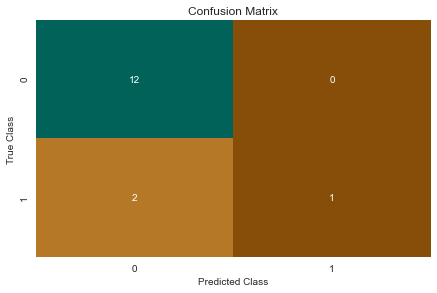

In [53]:
plot_confusion_matrix(test_labels, best_target_predicted_binary)

Sensitivity or TPR: 33.33333333333333%
Specificity or TNR: 100.0%
Precision: 100.0%
Negative Predictive Value: 85.71428571428571%
False Positive Rate: 0.0%
False Negative Rate: 66.66666666666666%
False Discovery Rate: 0.0%
Accuracy: 86.66666666666667%
Validation AUC 0.6666666666666666


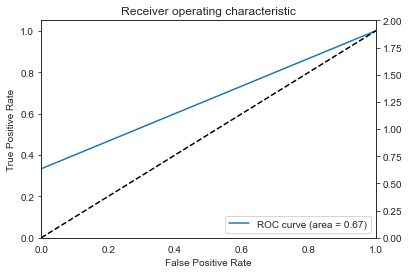

In [54]:
plot_roc(test_labels, best_target_predicted_binary)

## LOGISTIC REGRESSION

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# model training
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(train.drop(['Class'], axis=1).values, train['Class'].values)
print("Logistic Regression Training Completed")


Logistic Regression Training Completed


In [56]:
row = test.iloc[0:1, 1:]
print(row)
print("Single Row Prediction Probability:\n", model.predict_proba(row))

     Age  Steroid  Antivirals  Fatigue  Malaise  Anorexia  Liver Big  \
49  38.0        1           0        0        0         0          1   

    Liver Firm  Spleen Palpable  Spiders  Ascites  Varices  Bilirubin  \
49           1                1        0        1        1        0.7   

    ALK Phosphate  SGOT  Albumin  Histology  Female  
49          125.0  65.0      4.2          0       0  
Single Row Prediction Probability:
 [[0.79377308 0.20622692]]


In [57]:
# Note: its clear form dataset , this reult is correct as 0 corresponds to 52 means live

In [58]:
# batch predicttion
batch_X = test.iloc[:, 1:]
predicted_probabilities = model.predict_proba(batch_X)
target_predicted = pd.DataFrame(predicted_probabilities[:, 1], columns=['class'])

In [59]:
# applying threshold
def binary_convert(x):
    threshold = THRESHOLD_SET
    return 1 if x > threshold else 0

target_predicted['class'] = target_predicted['class'].apply(binary_convert)
target_predicted_binary = target_predicted['class']


In [60]:
test_labels = test.iloc[:, 0]
print(test_labels)

49     0
68     0
45     0
18     0
116    0
8      0
135    0
118    1
23     0
43     0
136    0
144    1
16     0
147    1
1      0
Name: Class, dtype: int32


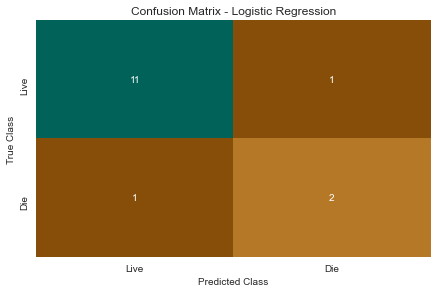

In [61]:
# confusion matrix
matrix = confusion_matrix(test_labels, target_predicted_binary)
df_confusion = pd.DataFrame(matrix, index=['Live','Die'], columns=['Live','Die'])
colormap = sns.color_palette("BrBG", 10)
sns.heatmap(df_confusion, annot=True, cbar=None, cmap=colormap)
plt.title("Confusion Matrix - Logistic Regression")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

True Negative (TN) : 11
False Positive (FP): 1
False Negative (FN): 1
True Positive (TP) : 2
Sensitivity or TPR: 66.66666666666666%
There is a 66.66666666666666% chance of predicting patients who died will die
Specificity or TNR: 91.66666666666666%
There is a 91.66666666666666% chance of predicting patients who lived will live.
Precision: 66.66666666666666%
Patient will die, and the probability that is correct is 66.66666666666666%
Negative Predictive Value: 91.66666666666666%
Patient will not die, but there is a 91.66666666666666% chance that is incorrect
False Positive Rate: 8.333333333333332%
There is a 8.333333333333332% chance that this positive result is incorrect.
False Negative Rate: 33.33333333333333%
There is a 33.33333333333333% chance that this negative result is incorrect.
False Discovery Rate: 33.33333333333333%
Patient will die, but there is a 33.33333333333333% chance this is incorrect.
Accuracy: 86.66666666666667%

Validation AUC 0.7916666666666666


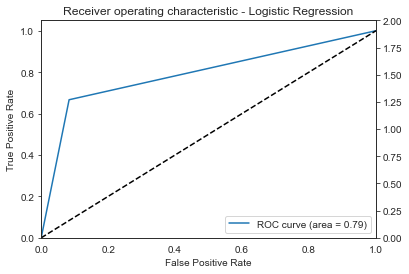

In [62]:
# metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt


lr_model = LogisticRegression(max_iter=1000, random_state=RAND, class_weight='balanced')
lr_model.fit(train.drop(['Class'], axis=1), train['Class'])

# Predicting probabilities
lr_probs = lr_model.predict_proba(test.iloc[:, 1:])[:, 1]
target_predicted = pd.DataFrame(lr_probs, columns=['class'])

# Thresholding
def binary_convert(x):
    threshold = THRESHOLD_SET
    return 1 if x > threshold else 0

target_predicted['class'] = target_predicted['class'].apply(binary_convert)
target_predicted_binary = target_predicted['class']

# Ground truth
test_labels = test.iloc[:, 0]

# Metrics
TN, FP, FN, TP = confusion_matrix(test_labels, target_predicted_binary).ravel()
print(f"True Negative (TN) : {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")
print(f"True Positive (TP) : {TP}")

Sensitivity  = float(TP)/(TP+FN)*100
print(f"Sensitivity or TPR: {Sensitivity}%")  
print(f"There is a {Sensitivity}% chance of predicting patients who died will die")

Specificity  = float(TN)/(TN+FP)*100
print(f"Specificity or TNR: {Specificity}%") 
print(f"There is a {Specificity}% chance of predicting patients who lived will live.")

Precision = float(TP)/(TP+FP)*100
print(f"Precision: {Precision}%")  
print(f"Patient will die, and the probability that is correct is {Precision}%")

NPV = float(TN)/(TN+FN)*100
print(f"Negative Predictive Value: {NPV}%") 
print(f"Patient will not die, but there is a {NPV}% chance that is incorrect")

FPR = float(FP)/(FP+TN)*100
print( f"False Positive Rate: {FPR}%") 
print( f"There is a {FPR}% chance that this positive result is incorrect.")

FNR = float(FN)/(TP+FN)*100
print(f"False Negative Rate: {FNR}%") 
print(f"There is a {FNR}% chance that this negative result is incorrect.")

FDR = float(FP)/(TP+FP)*100
print(f"False Discovery Rate: {FDR}%" )
print(f"Patient will die, but there is a {FDR}% chance this is incorrect.")

ACC = float(TP+TN)/(TP+FP+FN+TN)*100
print(f"Accuracy: {ACC}%")

print(f"\nValidation AUC", roc_auc_score(test_labels, target_predicted['class']))

# ROC Curve
fpr, tpr, thresholds = roc_curve(test_labels, target_predicted['class'])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Logistic Regression')
plt.legend(loc="lower right")

ax2 = plt.gca().twinx()
valid_thresholds = thresholds[np.logical_and(~np.isnan(thresholds), ~np.isinf(thresholds))]
ax2.set_ylim([valid_thresholds[-1], valid_thresholds[0]]) if valid_thresholds.size > 0 else None
ax2.set_xlim([fpr[0], fpr[-1]])
plt.show()


## RANDOM FOREST

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# model training
model = RandomForestClassifier(n_estimators=100, random_state=RAND, class_weight='balanced')
model.fit(train.drop(['Class'], axis=1).values, train['Class'].values)
print("Random Forest Training Completed")

Random Forest Training Completed


In [64]:
# predicting on single row
row = test.iloc[0:1, 1:]
print(row)
print("Single Row Prediction Probability:\n", model.predict_proba(row))


     Age  Steroid  Antivirals  Fatigue  Malaise  Anorexia  Liver Big  \
49  38.0        1           0        0        0         0          1   

    Liver Firm  Spleen Palpable  Spiders  Ascites  Varices  Bilirubin  \
49           1                1        0        1        1        0.7   

    ALK Phosphate  SGOT  Albumin  Histology  Female  
49          125.0  65.0      4.2          0       0  
Single Row Prediction Probability:
 [[0.84 0.16]]


In [65]:
# batch predicting
batch_X = test.iloc[:, 1:]
predicted_probabilities = model.predict_proba(batch_X)
target_predicted = pd.DataFrame(predicted_probabilities[:, 1], columns=['class'])

In [66]:
# threshold
def binary_convert(x):
    threshold = THRESHOLD_SET 
    return 1 if x > threshold else 0

target_predicted['class'] = target_predicted['class'].apply(binary_convert)
target_predicted_binary = target_predicted['class']

# predicting on single row
row = test.iloc[1:2, 1:]
print(row)
print("Single Row Prediction Probability:\n", model.predict_proba(row))


     Age  Steroid  Antivirals  Fatigue  Malaise  Anorexia  Liver Big  \
68  39.0        1           1        0        1         1          1   

    Liver Firm  Spleen Palpable  Spiders  Ascites  Varices  Bilirubin  \
68           1                1        1        1        1        1.0   

    ALK Phosphate  SGOT  Albumin  Histology  Female  
68           34.0  15.0      4.0          0       0  
Single Row Prediction Probability:
 [[0.95 0.05]]


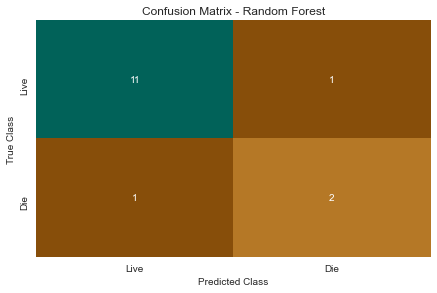

In [67]:
# confusion matrix
test_labels = test.iloc[:, 0]

matrix = confusion_matrix(test_labels, target_predicted_binary)
df_confusion = pd.DataFrame(matrix, index=['Live','Die'], columns=['Live','Die'])

colormap = sns.color_palette("BrBG", 10)
sns.heatmap(df_confusion, annot=True, cbar=None, cmap=colormap)
plt.title("Confusion Matrix - Random Forest")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()


True Negative (TN) : 11
False Positive (FP): 1
False Negative (FN): 1
True Positive (TP) : 2
Sensitivity or TPR: 66.66666666666666%
There is a 66.66666666666666% chance of predicting patients who died will die.
Specificity or TNR: 91.66666666666666%
There is a 91.66666666666666% chance of predicting patients who lived will live.
Precision: 66.66666666666666%
This patient will die, and the probability that is correct is 66.66666666666666%
Negative Predictive Value: 91.66666666666666%
This patient will live, but there is a 91.66666666666666% chance that is incorrect
False Positive Rate: 8.333333333333332%
There is a 8.333333333333332% chance that this positive result is incorrect.
False Negative Rate: 33.33333333333333%
There is a 33.33333333333333% chance that this negative result is incorrect.
False Discovery Rate: 33.33333333333333%
This patient will die, but there is a 33.33333333333333% chance this is incorrect.
Accuracy: 86.66666666666667%

Validation AUC 0.7916666666666666


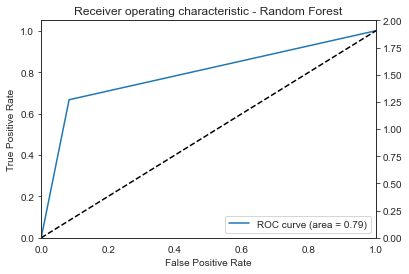

In [68]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(random_state=RAND, class_weight='balanced')
rf_model.fit(train.drop(['Class'], axis=1), train['Class'])

# Predict probabilitie
rf_probs = rf_model.predict_proba(test.iloc[:, 1:])[:, 1]
target_predicted = pd.DataFrame(rf_probs, columns=['class'])

# Thresholding
def binary_convert(x):
    threshold = THRESHOLD_SET
    return 1 if x > threshold else 0

target_predicted['class'] = target_predicted['class'].apply(binary_convert)
target_predicted_binary = target_predicted['class']

# Ground truth
test_labels = test.iloc[:, 0]

# Metrics
TN, FP, FN, TP = confusion_matrix(test_labels, target_predicted_binary).ravel()
print(f"True Negative (TN) : {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")
print(f"True Positive (TP) : {TP}")

Sensitivity  = float(TP)/(TP+FN)*100
print(f"Sensitivity or TPR: {Sensitivity}%")  
print(f"There is a {Sensitivity}% chance of predicting patients who died will die.")

Specificity  = float(TN)/(TN+FP)*100
print(f"Specificity or TNR: {Specificity}%") 
print(f"There is a {Specificity}% chance of predicting patients who lived will live.")

Precision = float(TP)/(TP+FP)*100
print(f"Precision: {Precision}%")  
print(f"This patient will die, and the probability that is correct is {Precision}%")

NPV = float(TN)/(TN+FN)*100
print(f"Negative Predictive Value: {NPV}%") 
print(f"This patient will live, but there is a {NPV}% chance that is incorrect")

FPR = float(FP)/(FP+TN)*100
print( f"False Positive Rate: {FPR}%") 
print( f"There is a {FPR}% chance that this positive result is incorrect.")

FNR = float(FN)/(TP+FN)*100
print(f"False Negative Rate: {FNR}%") 
print(f"There is a {FNR}% chance that this negative result is incorrect.")

FDR = float(FP)/(TP+FP)*100
print(f"False Discovery Rate: {FDR}%" )
print(f"This patient will die, but there is a {FDR}% chance this is incorrect.")

ACC = float(TP+TN)/(TP+FP+FN+TN)*100
print(f"Accuracy: {ACC}%")

print(f"\nValidation AUC", roc_auc_score(test_labels, target_predicted['class']))

# ROC Curve
fpr, tpr, thresholds = roc_curve(test_labels, target_predicted['class'])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Random Forest')
plt.legend(loc="lower right")

ax2 = plt.gca().twinx()
valid_thresholds = thresholds[np.logical_and(~np.isnan(thresholds), ~np.isinf(thresholds))]
ax2.set_ylim([valid_thresholds[-1], valid_thresholds[0]]) if valid_thresholds.size > 0 else None
ax2.set_xlim([fpr[0], fpr[-1]])
plt.show()


# COMPARISON

In [69]:
# Compute all metrics
from sklearn.metrics import (accuracy_score, recall_score, precision_score,
                             roc_auc_score, confusion_matrix)

def evaluate(name, model, X, y, thresh=THRESHOLD_SET):
    prob = model.predict_proba(X)[:, 1]
    pred = (prob > thresh).astype(int)

    tn, fp, fn, tp = confusion_matrix(y, pred).ravel()
    acc  = accuracy_score(y, pred) * 100
    sens = recall_score(y, pred, pos_label=1) * 100             # TPR
    spec = tn / (tn + fp) * 100                                 # TNR
    prec = precision_score(y, pred) * 100
    npv  = tn / (tn + fn) * 100 if (tn + fn) else 0
    fpr  = fp / (fp + tn) * 100 if (fp + tn) else 0
    fnr  = fn / (fn + tp) * 100 if (fn + tp) else 0
    auc  = roc_auc_score(y, prob)

    return dict(Model=name, Accuracy=acc, Sensitivity=sens, Specificity=spec,
                Precision=prec, NPV=npv, FPR=fpr, FNR=fnr, AUC=auc)

# Evaluate
y_true = test.iloc[:, 0]
X_test = test.iloc[:, 1:]

results = [
    evaluate("Logistic Regression", lr_model,        X_test, y_true),
    evaluate("XGBoost",             best_xgb_model,  X_test, y_true),
    evaluate("Random Forest",       rf_model,        X_test, y_true),
]

df_metrics = pd.DataFrame(results).round(2).sort_values("Accuracy", ascending=False)
display(df_metrics)

,Model,Accuracy,Sensitivity,Specificity,Precision,NPV,FPR,FNR,AUC
0,Logistic Regression,86.67,66.67,91.67,66.67,91.67,8.33,33.33,0.81
1,XGBoost,86.67,33.33,100.00,100.00,85.71,0.00,66.67,0.92
2,Random Forest,86.67,66.67,91.67,66.67,91.67,8.33,33.33,0.96


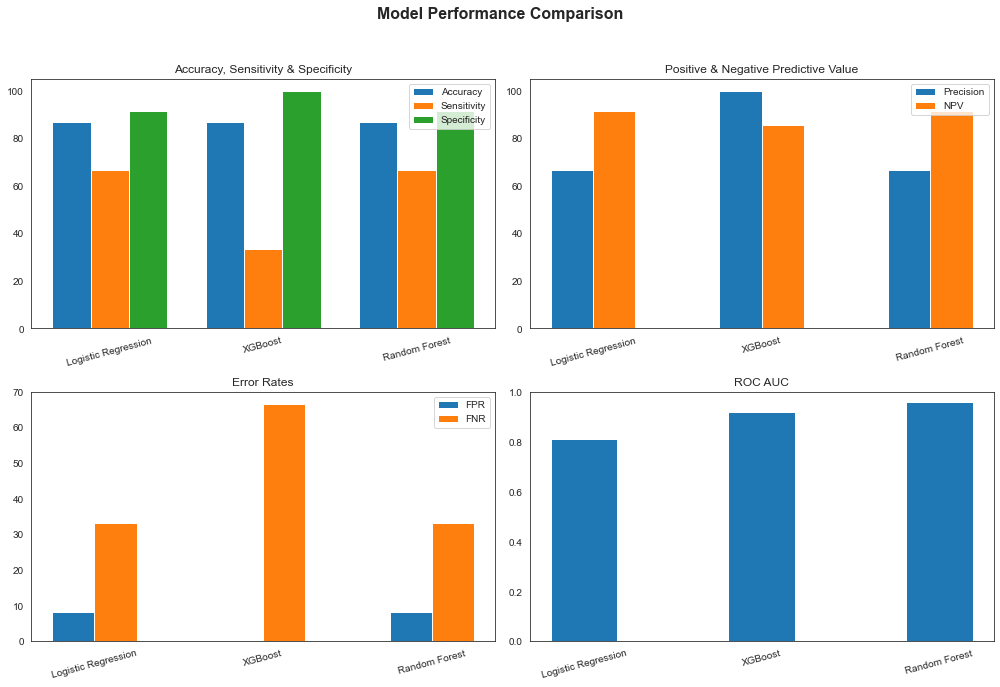

In [70]:
# Plots
import numpy as np, matplotlib.pyplot as plt

labels = df_metrics["Model"]
x      = np.arange(len(labels))
width  = 0.25

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Model Performance Comparison", fontsize=16, fontweight="bold")

# Accuracy / Sensitivity / Specificity
axs[0,0].bar(x - width, df_metrics["Accuracy"],     width, label="Accuracy")
axs[0,0].bar(x,        df_metrics["Sensitivity"],   width, label="Sensitivity")
axs[0,0].bar(x + width, df_metrics["Specificity"],  width, label="Specificity")
axs[0,0].set_xticks(x); axs[0,0].set_xticklabels(labels, rotation=15)
axs[0,0].set_title("Accuracy, Sensitivity & Specificity"); axs[0,0].legend()

# Precision / NPV
axs[0,1].bar(x - width/2, df_metrics["Precision"], width, label="Precision")
axs[0,1].bar(x + width/2, df_metrics["NPV"],       width, label="NPV")
axs[0,1].set_xticks(x); axs[0,1].set_xticklabels(labels, rotation=15)
axs[0,1].set_title("Positive & Negative Predictive Value"); axs[0,1].legend()

# FPR / FNR
axs[1,0].bar(x - width/2, df_metrics["FPR"], width, label="FPR")
axs[1,0].bar(x + width/2, df_metrics["FNR"], width, label="FNR")
axs[1,0].set_xticks(x); axs[1,0].set_xticklabels(labels, rotation=15)
axs[1,0].set_title("Error Rates"); axs[1,0].legend()

# ROC AUC
axs[1,1].bar(x, df_metrics["AUC"], width*1.5)
axs[1,1].set_xticks(x); axs[1,1].set_xticklabels(labels, rotation=15)
axs[1,1].set_ylim(0, 1); axs[1,1].set_title("ROC AUC")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])


# Conclusion

This project set out to build and compare predictive models for short‑term mortality in the UCI Hepatitis dataset.  It moved from raw CSV through cleaning, exploratory analysis, feature engineering, model training, and evaluation. After imputing missing values, casting binary flags, and reserving a portion of the data for hold‑out testing, we trained three algorithms, XGBoost (XGB), Logistic Regression (LR), Random Forest (RF), each with class‑balanced loss functions and light hyper‑parameter tuning. Key performance metrics were calculated from the unseen test split and visualised side‑by‑side.

Because it’s far more dangerous to miss a patient who really is at risk than to give one extra test to someone who’s fine, we set our alert threshold at 25%. At that level Logistic Regression and Random Forest each caught 2 of the 3 patients who later died, while flagging only 1 healthy patient for follow‑up (an 8% false‑alarm rate).  XGBoost never sent a healthy patient for extra testing, but it only caught 1 of the 3 high‑risk cases.  A higher cut‑off would let too many truly sick patients slip through, and a lower cut‑off would overwhelm the clinic with unnecessary work‑ups.

The study is limited by its small sample size (n = 155, test = 15), records from a single hospital, and static snapshot of patient state. Confidence intervals around all metrics are wide due to only 15 test cases and the models have not been externally validated with data from a different hospital and set of patients

Some ideas for future work should include collecting a larger, multi-hospital patient dataset, experimenting with methods to address the class imbalances between alive and dead patients, and integrating longitudinal lab trends to capture disease progression over time for patients. With those enhancements, the modelling framework demonstrated here can mature into a reliable decision‑support tool for hepatology clinics.